# CLUSTERING - KMEANS

<table>
<tr>
    <td>Nama</td>
    <td> : </td>
    <td><strong>Toufani Rizal Alfarisi</strong></td>
</tr>
<tr>
    <td>dataset</td>
    <td> : </td>
    <td><strong>Adult Data Set </strong></td>
</tr>
<tr>
    <td>Url</td>
    <td> : </td>
    <td><strong><a> https://archive.ics.uci.edu/ml/datasets/Adult </a></strong></td>
</tr>
<tr>
    <td>Algoritma</td>
    <td> : </td>
    <td><strong>CLUSTERING - KMEANS</strong></td>
</tr>
</table>

In [77]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

In [78]:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [79]:
# lihat deskripsi / meta datasetnya
with open("adult.names") as r:
    meta_dataset = r.read()

In [80]:
data = pd.read_csv("adult.data")

In [81]:
col_del = ["39", " 77516", " 13", " 2174", " 0", " 40"]
for col in data.columns:
    if col in col_del:
        data.drop(labels=[col], axis=1, inplace=True)
        print(f"feature {col} terhapus")
print("done")

feature 39 terhapus
feature  77516 terhapus
feature  13 terhapus
feature  2174 terhapus
feature  0 terhapus
feature  40 terhapus
done


In [82]:
'''
setiap nama kolom terlihat memiliki space sebanyak 1,
maka harus kita unindent kan
'''
cols = list(data.columns)
for idx in range(len(cols)):
    cols[idx] = cols[idx].split(" ")[-1]
cols[-1] = "target"
print("done")

done


In [83]:
# ganti nama kolom lama dengan yang baru 
data.columns = cols

In [84]:
clean_target = []
for dt in data.target.values:
    storage = dt.split(" ")[-1]
    clean_target.append(storage)
print("done")

done


In [85]:
# check apakah ada nan value
data.isna().sum()

State-gov        0
Bachelors        0
Never-married    0
Adm-clerical     0
Not-in-family    0
White            0
Male             0
United-States    0
target           0
dtype: int64

In [86]:
'''
karena semua recordnya berjenis kategori,
maka perlu diencode menjadi numerik 
'''
le = LabelEncoder()
for col in cols:
    data[col] = le.fit_transform(data[col])

In [87]:
# normalisasi data 
nor = StandardScaler()
for col in cols:
    if col == "target":
        break 
    else:
        data[col] = nor.fit_transform(data[[col]])

In [88]:
# lihat descripsi statistik
data.describe()

,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,target
count,3.256000e+04,3.256000e+04,3.256000e+04,3.256000e+04,3.256000e+04,3.256000e+04,3.256000e+04,3.256000e+04,32560.000000
mean,-1.457747e-16,-1.883287e-16,-3.000603e-17,6.623149e-17,7.856124e-17,7.637898e-17,-4.277223e-17,2.348108e-16,0.240817
std,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,0.427586
min,-2.657402e+00,-2.660869e+00,-1.734026e+00,-1.554341e+00,-9.001766e-01,-4.318841e+00,-1.422298e+00,-4.693235e+00,0.000000
25%,9.012148e-02,-3.354427e-01,-4.061830e-01,-8.449108e-01,-9.001766e-01,3.936745e-01,-1.422298e+00,2.915734e-01,0.000000
50%,9.012148e-02,1.813189e-01,-4.061830e-01,1.009965e-01,-2.778096e-01,3.936745e-01,7.030875e-01,2.915734e-01,0.000000
75%,9.012148e-02,4.396996e-01,9.216601e-01,8.104270e-01,9.669243e-01,3.936745e-01,7.030875e-01,2.915734e-01,0.000000
max,2.837645e+00,1.214842e+00,2.249503e+00,1.756334e+00,2.211658e+00,3.936745e-01,7.030875e-01,5.472046e-01,1.000000


In [90]:
# siapkan juga variable data untuk algoritma linear regresi
data_regresi = data.copy()

In [57]:
data.drop(labels=['target'], axis=1, inplace=True)

In [58]:
model = KMeans(n_clusters=3)
model.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [59]:
model.cluster_centers_

array([[-0.2122629 ,  0.04417254,  0.24889992, -0.16903937,  0.85831165,
        -0.17234375, -1.2552238 ,  0.22631131],
       [ 0.11400328, -0.01063127, -0.14541329,  0.08688461, -0.47996106,
         0.15269497,  0.69984641,  0.22777933],
       [ 0.05475363, -0.15100501,  0.06090114,  0.0852314 , -0.01908038,
        -0.59672   ,  0.0499202 , -3.78321531]])

In [61]:
predict = model.predict(data)
data_ = data.copy()

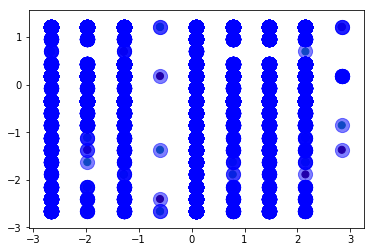

In [63]:
data = data_.values
plt.scatter(data[:, 0], data[:, 1], c=predict, s=50, cmap='viridis')
centers = model.cluster_centers_
plt.scatter(data[:, 0], data[:, 1], c='blue', s=200, alpha=0.5);

# REGRESI - REGRESI LINEAR

<table>
<tr>
    <td>Nama</td>
    <td> : </td>
    <td><strong>Toufani Rizal Alfarisi</strong></td>
</tr>
<tr>
    <td>dataset</td>
    <td> : </td>
    <td><strong>Adult Data Set </strong></td>
</tr>
<tr>
    <td>Url</td>
    <td> : </td>
    <td><strong><a> https://archive.ics.uci.edu/ml/datasets/Adult </a></strong></td>
</tr>
<tr>
    <td>Algoritma</td>
    <td> : </td>
    <td><strong>REGRESI - REGRESI LINEAR</strong></td>
</tr>
</table>

In [101]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import metrics

x = data_regresi.iloc[:, :-1]
y = data_regresi.iloc[:, 1]
x_train, x_test, y_train, y_test = train_test_split(
    x, y, 
    test_size=0.3, 
    random_state=46,
)

In [102]:
print('x_train ==> ', x_train.shape)
print('y_train ==> ', y_train.shape)
print('x_test ==> ', x_test.shape)
print('y_test ==> ', y_test.shape)

x_train ==>  (22792, 8)
y_train ==>  (22792,)
x_test ==>  (9768, 8)
y_test ==>  (9768,)


In [103]:
model_reg = LinearRegression()
model_reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [117]:
y_pred = model_reg.predict(x_test)
mse = metrics.mean_squared_error(y_test, y_pred) * 100
mae = metrics.mean_absolute_error(y_test, y_pred) * 100 
print("mean-squared-error \n", mse)
print("mean-absolute-error \n", mae)

mean-squared-error 
 1.547107042314471e-27
mean-absolute-error 
 2.93230353775789e-13
